<center><h1>Chang_Yi_HW2</h1></center>
<br>
<br>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

Get the Cycle Power Plant Data Set

In [2]:
data = pd.read_excel('../data/Folds5x2_pp.xlsx')

### (b) Exploring the data

#### i. rows and columns

In [3]:
num_rows, num_columns = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 9568
Number of columns: 5


Columns
- AT: Temperature
- V: Exhaust Vacuum
- AP: Ambient Pressure
- RH: Relative Humidity
- PE: Net hourly electrical energy output

<br>
Rows: 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load

#### ii. pairwise scatterplots of all the variables

/Users/evangeline/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


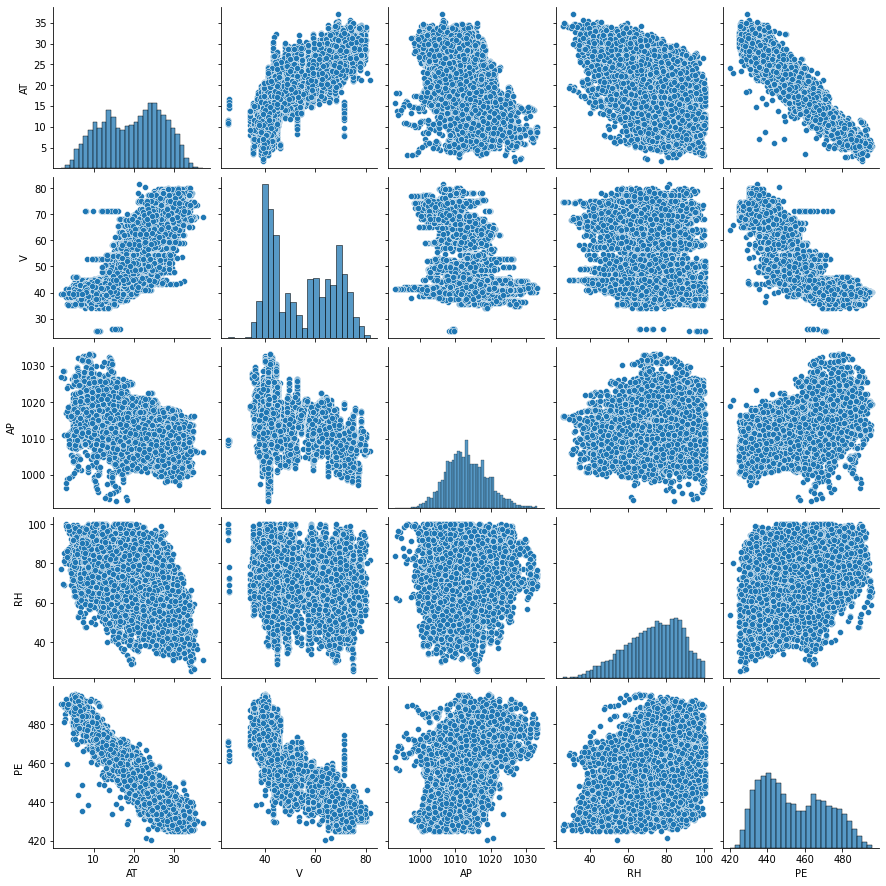

In [4]:
sns.pairplot(data)
plt.show()

- approximate linear relationshop between PE and AT
- approximate linear relationship between V and PE
- distribution of V is not like normal distribution

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c) Simple Linear Regression
#### Linear Regression

Predictor: AT
P-value: 0.0
There is a statistically significant association between AT and PE.


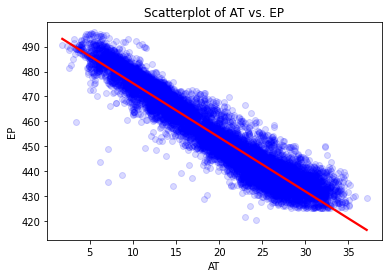

Predictor: V
P-value: 0.0
There is a statistically significant association between V and PE.


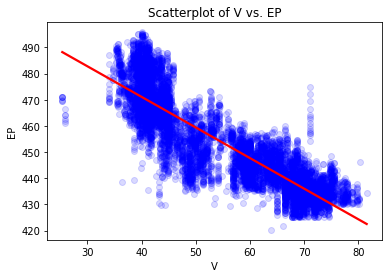

Predictor: AP
P-value: 0.0
There is a statistically significant association between AP and PE.


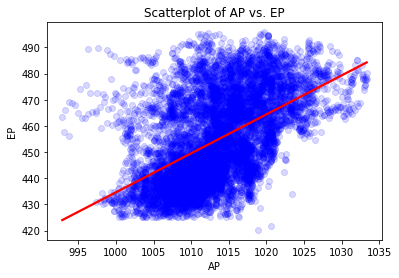

Predictor: RH
P-value: 0.0
There is a statistically significant association between RH and PE.


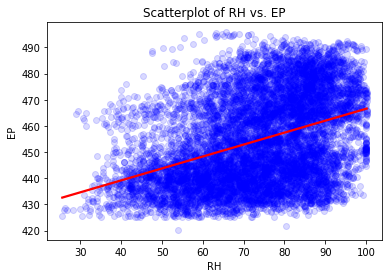

In [6]:
predictors = ['AT', 'V', 'AP', 'RH']

for predictor in predictors:
    X = data[predictor].values.reshape(-1, 1)
    y = data['PE']
    
    model = LinearRegression()
    model.fit(X, y)

    print(f"Predictor: {predictor}")

    X = sm.add_constant(X)
    model_ols = sm.OLS(y, X).fit()
    print(f"P-value: {model_ols.pvalues[1]}")

    if model_ols.pvalues[1] < 0.05:
        print(f"There is a statistically significant association between {predictor} and PE.")
    else:
        print(f"There is no statistically significant association between {predictor} and PE.")

    sns.regplot(x=predictor, y='PE', data=data, ci=None, 
                scatter_kws={"color": "blue", 'alpha': 0.15}, 
                line_kws={"color": "red"})
    plt.xlabel(predictor)
    plt.ylabel('EP')
    plt.title(f"Scatterplot of {predictor} vs. EP")
    plt.show()

#### Outliers Detection

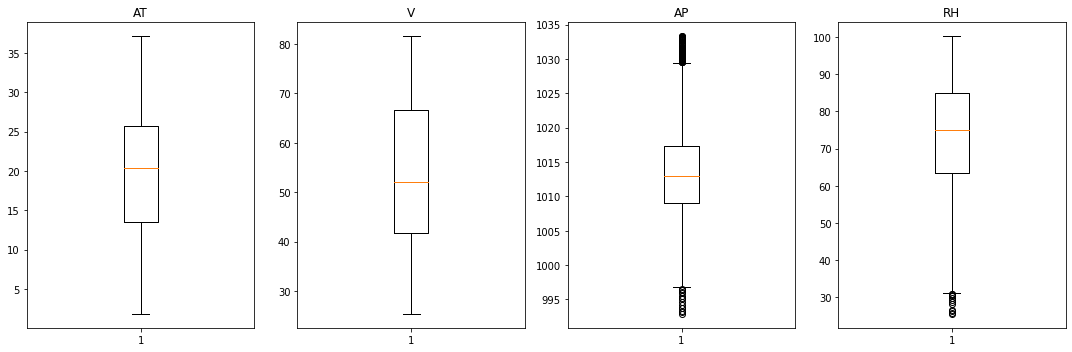

Outliers:
      AT   V       AP     RH
238  NaN NaN  1030.46    NaN
319  NaN NaN  1033.25    NaN
368  NaN NaN  1030.18    NaN
536  NaN NaN  1031.10    NaN
571  NaN NaN  1029.65    NaN
...   ..  ..      ...    ...
9075 NaN NaN      NaN  30.99
9159 NaN NaN  1031.71    NaN
9267 NaN NaN  1031.21    NaN
9342 NaN NaN  1031.32    NaN
9366 NaN NaN  1030.61    NaN

[100 rows x 4 columns]


In [7]:
predictors = ['AT', 'V', 'AP', 'RH']

outliers = {}

fig, axes = plt.subplots(nrows=1, ncols=len(predictors), figsize=(15, 5))

for i, predictor in enumerate(predictors):
    axes[i].boxplot(data[predictor])
    axes[i].set_title(predictor)
    
    Q1 = data[predictor].quantile(0.25)
    Q3 = data[predictor].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_indices = (data[predictor] < lower_bound) | (data[predictor] > upper_bound)
    
    outliers[predictor] = data[predictor][outlier_indices]

plt.tight_layout()
plt.show()

outliers_df = pd.DataFrame(outliers)

print("Outliers:")
print(outliers_df)

### (d) Multiple Regression

In [8]:
X = data[['AT', 'V', 'AP', 'RH']]
X = sm.add_constant(X)
y = data['PE']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:32:20   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

For all predictors, we may reject the null hypothesis H0 :βj =0 because they all have a p-value (P>|t|) that's smaller than 0.05.

### (e) 1c Compare to 1d

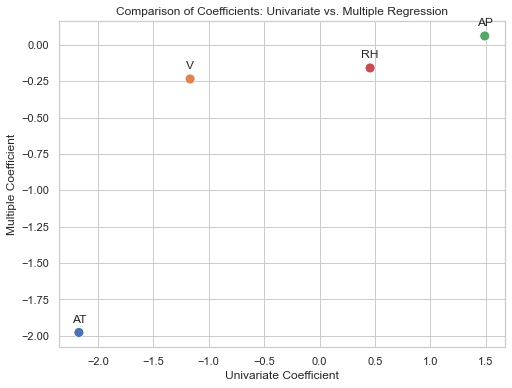

In [9]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

univariate_coeffs = []
multiple_coeffs = []

for predictor in predictors:
    X_uni = data[predictor].values.reshape(-1, 1)
    y_uni = data[response_variable]
    model_uni = LinearRegression()
    model_uni.fit(X_uni, y_uni)
    univariate_coeffs.append(model_uni.coef_[0])

    X_multi = data[predictors] 
    X_multi = sm.add_constant(X_multi)
    model_multi = sm.OLS(y_uni, X_multi).fit()
    multiple_coeffs.append(model_multi.params[predictor])

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=univariate_coeffs, y=multiple_coeffs, hue=predictors, palette="deep", s=100)
plt.xlabel("Univariate Coefficient")
plt.ylabel("Multiple Coefficient")
plt.title("Comparison of Coefficients: Univariate vs. Multiple Regression")
plt.legend([],[], frameon=False)

for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (univariate_coeffs[i], multiple_coeffs[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)
plt.show()

### (f) Nonlinear Association

In [10]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'
degree = 3   # degree of the polynomial
nonlinear_evidence = []

for predictor in predictors:
    X_poly = np.column_stack([data[predictor], data[predictor]**2, data[predictor]**3])
    X_poly = sm.add_constant(X_poly)
    
    model_poly = sm.OLS(data[response_variable], X_poly).fit()
    
    p_values = model_poly.pvalues[2:]
    evidence = any(p_values < 0.05)  # set α as 0.05
    nonlinear_evidence.append((predictor, evidence, model_poly))

for predictor, evidence, model_poly in nonlinear_evidence:
    print(f"Predictor: {predictor}")
    if evidence:
        print(f"There is evidence of a nonlinear association between {predictor} and {response_variable}.")
    else:
        print(f"There is no significant evidence of a nonlinear association between {predictor} and {response_variable}.")
    
    print(model_poly.summary())
    print("\n" + "_"*100 + "\n")


Predictor: AT
There is evidence of a nonlinear association between AT and PE.
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:32:21   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### (g) Interactions of Predictors

In [11]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

interaction_terms = []
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        interaction_term = f"{predictors[i]}*{predictors[j]}"
        interaction_terms.append(interaction_term)

formula = f"{response_variable} ~ {' + '.join(predictors)} + {' + '.join(interaction_terms)}"

model_interaction = sm.OLS.from_formula(formula, data=data).fit()

interaction_pvalues = model_interaction.pvalues.filter(like=':')
significant_interactions = interaction_pvalues[interaction_pvalues < 0.05]   # set α as 0.05

for interaction_term, p_value in significant_interactions.items():
    predictor1, predictor2 = interaction_term.split(':')
    print(f"There is evidence of association of interactions of {predictor1.strip()} and {predictor2.strip()}, p-value = {p_value}")

print('\n', model_interaction.summary())

There is evidence of association of interactions of AT and V, p-value = 3.333357616352205e-117
There is evidence of association of interactions of AT and RH, p-value = 1.2169442667283973e-10
There is evidence of association of interactions of V and AP, p-value = 2.877025899524539e-07
There is evidence of association of interactions of AP and RH, p-value = 0.03360557262227662

                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:32:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                       

### (h) Improvement
#### First model (only AT, V, AP, RH)

In [12]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[response_variable], test_size=0.3, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 21.2592
Test MSE: 19.6337


#### Second Model (all)

In [13]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[response_variable], test_size=0.3, random_state=5)

X_train['AT*V'] = X_train['AT'] * X_train['V']
X_train['AT*AP'] = X_train['AT'] * X_train['AP']
X_train['AT*RH'] = X_train['AT'] * X_train['RH']
X_train['V*AP'] = X_train['V'] * X_train['AP']
X_train['V*RH'] = X_train['V'] * X_train['RH']
X_train['AP*RH'] = X_train['AP'] * X_train['RH']
X_train['AT^2'] = X_train['AT']**2
X_train['V^2'] = X_train['V']**2
X_train['AP^2'] = X_train['AP']**2
X_train['RH^2'] = X_train['RH']**2

X_test['AT*V'] = X_test['AT'] * X_test['V']
X_test['AT*AP'] = X_test['AT'] * X_test['AP']
X_test['AT*RH'] = X_test['AT'] * X_test['RH']
X_test['V*AP'] = X_test['V'] * X_test['AP']
X_test['V*RH'] = X_test['V'] * X_test['RH']
X_test['AP*RH'] = X_test['AP'] * X_test['RH']
X_test['AT^2'] = X_test['AT']**2
X_test['V^2'] = X_test['V']**2
X_test['AP^2'] = X_test['AP']**2
X_test['RH^2'] = X_test['RH']**2

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

y_train_pred = model.predict(sm.add_constant(X_train))
y_test_pred = model.predict(sm.add_constant(X_test))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print('\n', model.summary())

Train MSE: 18.6194
Test MSE: 16.9524

                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7014.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:32:21   Log-Likelihood:                -19294.
No. Observations:                6697   AIC:                         3.862e+04
Df Residuals:                    6682   BIC:                         3.872e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7

#### Third Model (insignificant variables removed)

In [14]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[response_variable], test_size=0.3, random_state=5)

X_train['AT*V'] = X_train['AT'] * X_train['V']
X_train['AT*RH'] = X_train['AT'] * X_train['RH']
X_train['AP*RH'] = X_train['AP'] * X_train['RH']
X_train['AT^2'] = X_train['AT']**2
X_train['AP^2'] = X_train['AP']**2
X_train['RH^2'] = X_train['RH']**2

X_test['AT*V'] = X_test['AT'] * X_test['V']
X_test['AT*RH'] = X_test['AT'] * X_test['RH']
X_test['AP*RH'] = X_test['AP'] * X_test['RH']
X_test['AT^2'] = X_test['AT']**2
X_test['AP^2'] = X_test['AP']**2
X_test['RH^2'] = X_test['RH']**2

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

y_train_pred = model.predict(sm.add_constant(X_train))
y_test_pred = model.predict(sm.add_constant(X_test))

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print('\n', model.summary())

Train MSE: 18.6456
Test MSE: 16.9942

                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9811.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:32:21   Log-Likelihood:                -19299.
No. Observations:                6697   AIC:                         3.862e+04
Df Residuals:                    6686   BIC:                         3.869e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9

### (i) KNN

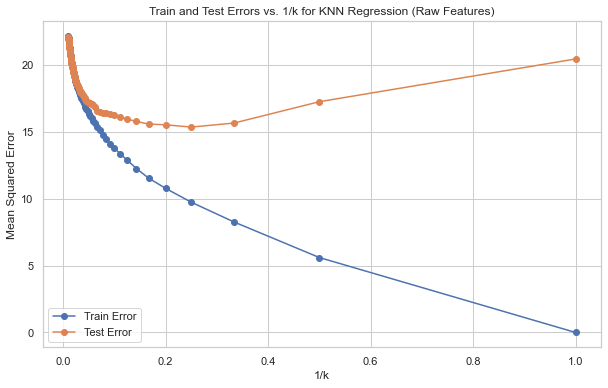

Best value of k (Raw Features): 4, Test Error: 15.3649


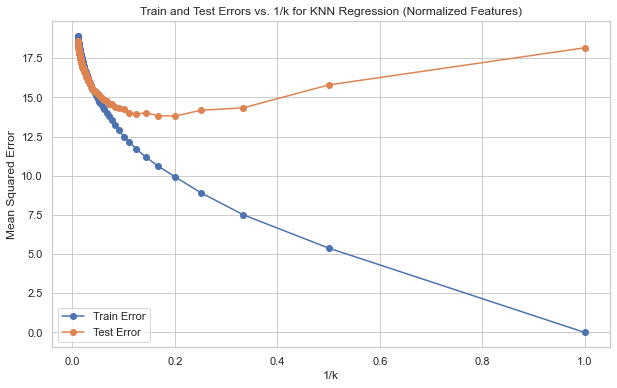

Best value of k (Normalized Features): 5, Test Error: 13.8129


In [15]:
predictors = ['AT', 'V', 'AP', 'RH']
response_variable = 'PE'

X = data[predictors]
y = data[response_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
k_values = range(1, 101)

# Raw Features
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

inverse_k_values = [1 / k for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(inverse_k_values, train_errors, label='Train Error', marker='o')
plt.plot(inverse_k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression (Raw Features)')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(test_errors)]
print(f"Best value of k (Raw Features): {best_k}, Test Error: {min(test_errors):.4f}")

# Normalized Features
train_errors_n = []
test_errors_n = []

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normalized, y_train)

    y_train_pred = knn.predict(X_train_normalized)
    y_test_pred = knn.predict(X_test_normalized)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors_n.append(train_mse)
    test_errors_n.append(test_mse)

inverse_k_values_n = [1 / k for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(inverse_k_values_n, train_errors_n, label='Train Error', marker='o')
plt.plot(inverse_k_values_n, test_errors_n, label='Test Error', marker='o')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression (Normalized Features)')
plt.legend()
plt.grid(True)
plt.show()

best_k_n = k_values[np.argmin(test_errors_n)]
print(f"Best value of k (Normalized Features): {best_k_n}, Test Error: {min(test_errors_n):.4f}")

### (j ) Compare KNN and Linear

| Model                            | Test Error  |
|----------------------------------|-------------|
| Regression (AT, V, AP, RH)       | 19.6337     |
| Regression (all)                 | 16.9524     |
| Regression (insignificant variables removed) | 16.9942   |
| KNN (Raw Features)               | 15.3649     |
| KNN (Normalized Features)        | 13.8129     |

It seems that the KNN regression model with normalized features has a lower test error compared to Linear Regression. And the lower test error indicates that the KNN model is performing better in terms of prediction accuracy on the test data.
However, KNN requires more time to run, and hence might not be as useful if the dataset is a lot bigger. Additionally, Linear Regression models also provide coefficient values that can increases interpretability, which KNN lacks.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

Better<br>With a large sample size, flexible methods can perform well because they have sufficient data to learn complex relationships without overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Worse<br>Using flexible methods can lead to overfitting due to the high dimensionality and limited data. Inflexible methods may generalize better.

### (c) The relationship between the predictors and response is highly non-linear.

Better<br>Flexible methods are well-suited for capturing non-linear relationships than inflexible methods.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Worse<br>High Var(ϵ) indicates a high level of irreducible error. Using flexible methods may lead to overfitting because the model tries to capture not only the true signal but also the noise in the data.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [16]:
X_train = np.array([[0, 3, 0],
                    [2, 0, 0],
                    [0, 1, 3],
                    [0, 1, 2],
                    [-1, 0, 1],
                    [1, 1, 1]])

Z = np.array([0, 0, 0])

distances = np.sqrt(np.sum((X_train - Z) ** 2, axis=1))

euclidean_distances = pd.DataFrame(X_train, columns=['X1', 'X2', 'X3'])
euclidean_distances['Y'] = ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
euclidean_distances['Distance'] = distances

euclidean_distances.index = euclidean_distances.index + 1

print(euclidean_distances)

   X1  X2  X3      Y  Distance
1   0   3   0    Red  3.000000
2   2   0   0    Red  2.000000
3   0   1   3    Red  3.162278
4   0   1   2  Green  2.236068
5  -1   0   1  Green  1.414214
6   1   1   1    Red  1.732051


### (b) What is our prediction with K = 1? Why?

Green<br>The nearest neighbor to (X1,X2,X3)=(0,0,0) is obersavation 5, which is green.

### (c) What is our prediction with K = 3? Why?

Red<br>The 3 nearest neighbors to (X1,X2,X3)=(0,0,0) are observation 2, 5, 6. The majority class among these three is 'Red,' so the prediction is 'Red.'

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

Small<br>Smaller K values lead to more flexible and complex decision boundaries, which are better suited to capture the intricacies of non-linear relationships in the data.